In [24]:
import os
import time
import uuid
import cv2

### Получение изображений с вебкамеры с помощью OpenCV

In [5]:
IMAGES_PATH = os.path.join('data','images') #куда будем класть фотки
number_images = 30

In [6]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read() #запись с камеры
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg') #генерация имени файла с гуидом
    cv2.imwrite(imgname, frame) #запись на диск
    cv2.imshow('frame', frame) #отображение фотки
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Аннотирование изображений

In [73]:
!labelme

Здесь нужно повесить аннотацию на лицо

### Импорт Tensorflow и других зависимостей

In [4]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
# Нет видеокарты
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
tf.config.list_physical_devices('GPU')

[]

### Загрузка полученных изображений

In [8]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [9]:
images.as_numpy_iterator().next()

b'data\\images\\6e0488e5-7e12-11ed-a016-90e868f1ba63.jpg'

In [11]:
def load_image(x): 
    byte_img = tf.io.read_file(x) # Прочитает файл, вернёт байты
    img = tf.io.decode_jpeg(byte_img) # Декодирует байты как jpg
    return img

In [11]:
images = images.map(load_image)

In [12]:
images.as_numpy_iterator().next() # Проверка

array([[[ 57,  75,  77],
        [ 54,  74,  73],
        [ 53,  73,  72],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[ 53,  71,  71],
        [ 52,  70,  70],
        [ 51,  71,  69],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[ 54,  70,  69],
        [ 51,  70,  68],
        [ 50,  69,  65],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[ 34,  39,  45],
        [ 37,  42,  48],
        [ 37,  44,  50],
        ...,
        [162, 171, 200],
        [165, 172, 201],
        [165, 172, 201]],

       [[ 28,  36,  39],
        [ 30,  38,  41],
        [ 32,  39,  45],
        ...,
        [165, 172, 201],
        [166, 171, 201],
        [166, 171, 201]],

       [[ 27,  35,  37],
        [ 29,  37,  39],
        [ 29,  36,  42],
        ...,
        [165, 172, 201],
        [167, 172, 202],
        [167, 172, 202]]

In [13]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### Отображение изображений

In [14]:
image_generator = images.batch(4).as_numpy_iterator() # Группировка по 4

In [15]:
plot_images = image_generator.next()

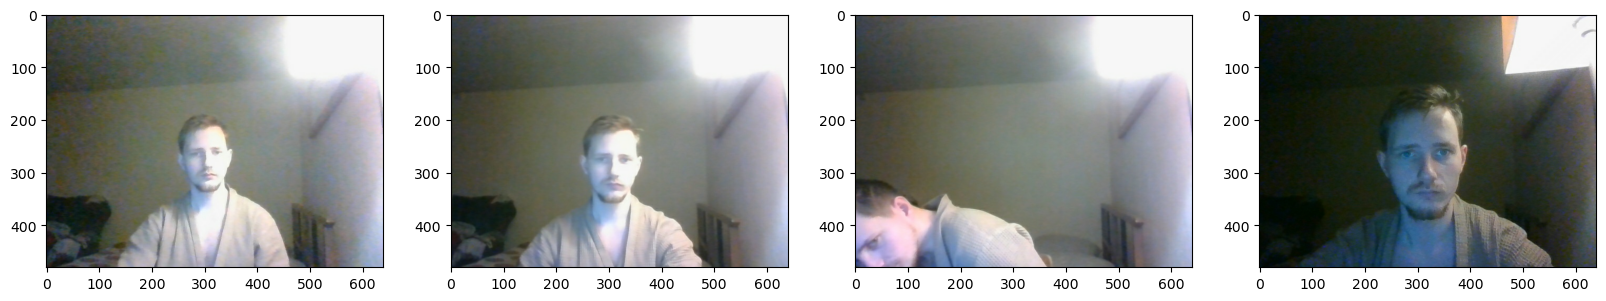

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # Вывод фоток по 4
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### Руками перенес данные в папки

Здесь данные были вручную рассортированы по соответствующим директориям:

In [ ]:
90*.7 # 63 в train

In [ ]:
90*.15 # 14 и 13 в test и val

### Забрал в соответствущие папки labels

In [23]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

### Тестовое изображение

In [26]:
img = cv2.imread(os.path.join('data','train', 'images','548264e7-7e12-11ed-abee-90e868f1ba63.jpg'))

In [29]:
img.shape # Размер изображения в пикселях

(480, 640, 3)

In [36]:
with open(os.path.join('data', 'train', 'labels', '548264e7-7e12-11ed-abee-90e868f1ba63.json'), 'r') as f:
    label = json.load(f) # Получить координаты аннотации лица для фотографии

In [39]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[325.625, 193.75], [444.375, 368.75]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\548264e7-7e12-11ed-abee-90e868f1ba63.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImK

In [37]:
label['shapes'][0]['points']

[[325.625, 193.75], [444.375, 368.75]]

In [38]:
type(label)

dict

### Настройка albumentations для форматирования данных

In [25]:
import albumentations as alb

In [51]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), # Вырезает случайную часть фотки
                         alb.HorizontalFlip(p=0.5), # Поворачивает фотку с вероятностью 0.5 вокруг оси у
                         alb.RandomBrightnessContrast(p=0.2), # Изменяет яркость и контраст фотки с вероятностью 0.2
                         alb.RandomGamma(p=0.2), #Гамма-коррекция изображения с вероятностью 0.2
                         alb.RGBShift(p=0.2), # Сдвигает значения каждого канала RGB с вероятностью 0.2
                         alb.VerticalFlip(p=0.5)], # Поворачивает фотку с вероятностью 0.5 вокруг оси х
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### Извлечь координаты и пересчитать их

In [46]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [47]:
coords

[325.625, 193.75, 444.375, 368.75]

In [48]:
coords = list(np.divide(coords, [640,480,640,480])) # Приведение координат к формату albumentations (были в пикселях, стали в относительных величинах)

In [49]:
coords

[0.5087890625, 0.4036458333333333, 0.6943359375, 0.7682291666666666]

### Применить аугментацию к тестовому изображению

In [60]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [53]:
type(augmented)

dict

In [56]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [57]:
augmented['image'].shape

(450, 450, 3)

In [58]:
augmented['bboxes']

[(0.23916666666666664,
  0.41055555555555556,
  0.5030555555555556,
  0.7994444444444444)]

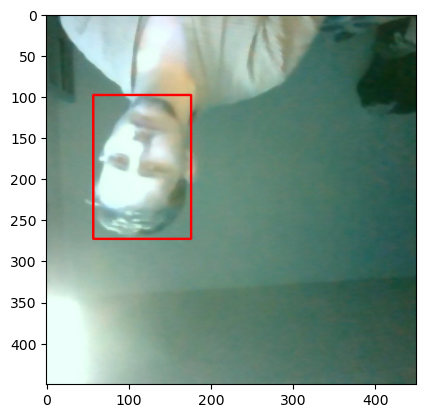

In [61]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

### Процесс аугментации для всех изображений

In [62]:
for partition in ['train','test','val']: # Для изображений во всех трёх папках
    for image in os.listdir(os.path.join('data', partition, 'images')): # Цикл по всем фоткам
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001] # Значения координат по умолчанию
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json') # Генерация имени аннотации по имени фотки
        if os.path.exists(label_path): # Если есть такая аннотация (а она должна быть), получаем координаты лица на фотке
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60): # Для каждого изображения 60 раз делаем аугментацию
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                # сохраняем аугментированное изображение в папку aug_data/(train|test|val)/images

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f) # сохраняем аннотацию к аугментированному изображению в папку aug_data/(train|test|val)/labels

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.5478515625, 0.703125, 0.3955078125, 0.421875, 'face'].
x_max is less than or equal to x_min for bbox [0.2099609375, 0.9973958333333334, 0.0, 0.6410984848484849, 'face'].
x_max is less than or equal to x_min for bbox [0.2001953125, 0.9921875, 0.0048828125, 0.640625, 'face'].


In [12]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)  # Загрузить не перемешивая
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120))) # Сжать изображение, чтобы уменьшить количество данных
train_images = train_images.map(lambda x: x/255) # Масштабирование, чтобы применить сигмоид-активацию

In [13]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [14]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [15]:
train_images.as_numpy_iterator().next()

array([[[0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        ...,
        [0.3362745 , 0.3529412 , 0.3254902 ],
        [0.3310049 , 0.35882354, 0.3106005 ],
        [0.33578432, 0.36421567, 0.31164217]],

       [[0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        ...,
        [0.35637254, 0.359375  , 0.33529413],
        [0.34552696, 0.35637254, 0.31323528],
        [0.33903188, 0.3458946 , 0.3101103 ]],

       [[0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        ...,
        [0.35      , 0.3461397 , 0.32634804],
        [0.34914216, 0.35686275, 0.31378677],
        [0.33578432, 0.3516544 , 0.34969363]],

       ...,

       [[0.41819853, 0.4086397 , 0.44810048],
        [0.41476715, 0.37849265, 0.39773285],
        [0.41427696, 0

### Функция загрузки аннотаций

In [2]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### Загрузка аннотаций в датасеты

In [5]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False) # Получает пути до файлов аннотаций
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16])) # Применяет к каждому файлу load_labels

In [6]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [7]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [8]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4214, 0.375 , 0.716 , 0.7637], dtype=float16))

### Проверка размерности

In [16]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 840, 840, 660, 660)

### Создание датасетов для обучения

In [17]:
train = tf.data.Dataset.zip((train_images, train_labels)) # Соединяем изображения и аннотации к ним
train = train.shuffle(5000) # Перемешать
train = train.batch(8) # Режем батчами по 8 изображений и аннотаций к ним
train = train.prefetch(4) # Для улучшения производительности подготавливает следующие 4 элемента, пока 4 обрабатываются 

In [18]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [19]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [20]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.528  , 0.02556, 0.9863 , 0.6313 ],
        [0.432  , 0.291  , 0.6567 , 0.6274 ],
        [0.588  , 0.3472 , 0.8604 , 0.739  ],
        [0.2214 , 0.06445, 0.627  , 0.606  ],
        [0.421  , 0.4478 , 0.6484 , 0.7144 ],
        [0.3037 , 0.08887, 0.709  , 0.6304 ],
        [0.74   , 0.5654 , 1.     , 0.9155 ],
        [0.4219 , 0.155  , 0.8555 , 0.7246 ]], dtype=float16))

In [ ]:
train.as_numpy_iterator().next()[1]

### Показать изображения и их аннотации

In [21]:
data_samples = train.as_numpy_iterator()

In [22]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


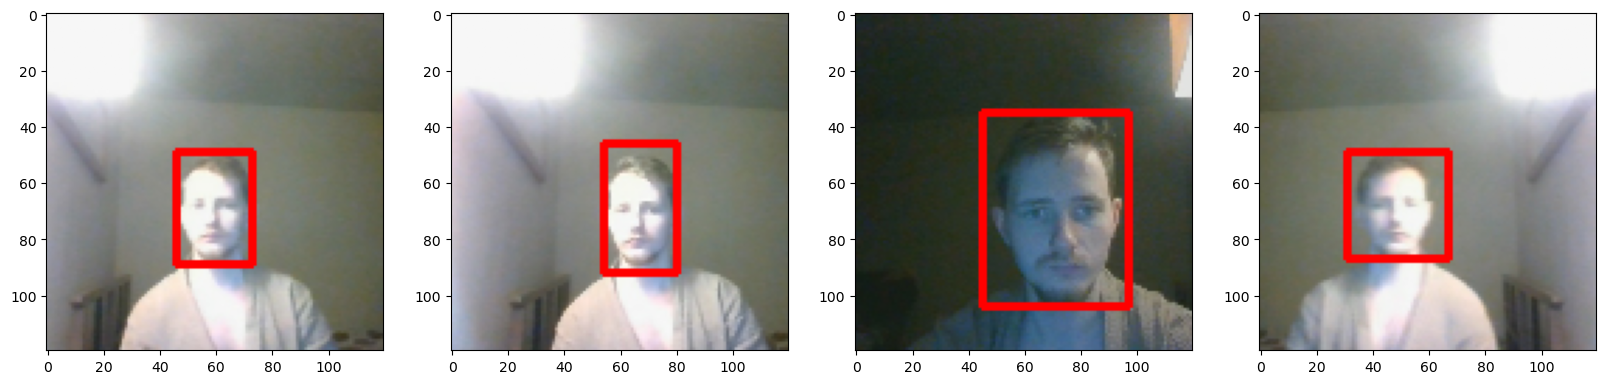

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

### Импорт слоёв и нейросети

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### Загрузка VGG16

VGG16 - модель сверточной нейронной сети, которая достигает точности 92.7% в задаче распознавания объектов

VGG16 - модель для классификации. В этом случае используется VGG16 для классификации изображений и наша модель для регрессии

In [27]:
vgg = VGG16(include_top=False)

In [28]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Построение модели

In [29]:
def build_model(): 
    input_layer = Input(shape=(120,120,3)) # Определение входного слоя
    
    vgg = VGG16(include_top=False)(input_layer) # Построение слоя VGG16

    # Модель классификации  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1) 
    class2 = Dense(1, activation='sigmoid')(class1) # Сигмоид, т.к. имеем значения от 0 до 1
    
    # Модель регрессии
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### Тестирование нейросети

In [30]:
facetracker = build_model()

In [31]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [32]:
X, y = train.as_numpy_iterator().next()

In [33]:
X.shape

(8, 120, 120, 3)

In [34]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 510ms/step


In [35]:
classes, coords

(array([[0.49536884],
        [0.40754485],
        [0.49652082],
        [0.41789293],
        [0.5120571 ],
        [0.4709136 ],
        [0.45408675],
        [0.4320088 ]], dtype=float32),
 array([[0.49680606, 0.54798317, 0.490359  , 0.62048495],
        [0.5312214 , 0.6255574 , 0.39405906, 0.73813224],
        [0.5350804 , 0.5209296 , 0.43442658, 0.62831545],
        [0.5094205 , 0.60113907, 0.45163146, 0.716521  ],
        [0.47587943, 0.53860635, 0.5410367 , 0.60113186],
        [0.5305928 , 0.5383624 , 0.41643432, 0.6472672 ],
        [0.5291306 , 0.6039866 , 0.38382256, 0.6900488 ],
        [0.5242544 , 0.5766673 , 0.4478861 , 0.60190237]], dtype=float32))

### Определение оптимизатора и LR

In [36]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [37]:
lr_decay

0.0007168458781362006

In [38]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### Создание функции потерь

In [39]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) # Расстояние между координатами и предсказанными координатами
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [40]:
classloss = tf.keras.losses.BinaryCrossentropy() # Потому что это задача классификации
regressloss = localization_loss

### Тестирование функций потерь

In [41]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.5093508>

In [42]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.72921926>

In [43]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.5093508>

### Класс модели

In [44]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): # Получает один батч данных
        
        X, y = batch # Берем данные из батча
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True) # Предсказание
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss # Вычисление потерь (отклонения)
            
            grad = tape.gradient(total_loss, self.model.trainable_variables) # Вычисление градиента
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables)) # Применение полученного градиента
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): # Вызывается, если были переданы данные валидации (val)
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [45]:
model = FaceTracker(facetracker)

In [46]:
model.compile(opt, classloss, regressloss)

### Обучение

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
465/465 [==============================] - 373s 796ms/step - total_loss: 0.1647 - class_loss: 0.0536 - regress_loss: 0.1379 - val_total_loss: 0.0150 - val_class_loss: 0.0035 - val_regress_loss: 0.0133
Epoch 2/10
465/465 [==============================] - 423s 905ms/step - total_loss: 0.0326 - class_loss: 0.0047 - regress_loss: 0.0303 - val_total_loss: 0.0076 - val_class_loss: 3.3719e-04 - val_regress_loss: 0.0075
Epoch 3/10
465/465 [==============================] - 434s 900ms/step - total_loss: 0.0153 - class_loss: 2.5610e-04 - regress_loss: 0.0152 - val_total_loss: 0.0143 - val_class_loss: 3.5583e-04 - val_regress_loss: 0.0142
Epoch 4/10
465/465 [==============================] - 415s 887ms/step - total_loss: 0.0124 - class_loss: 1.3313e-04 - regress_loss: 0.0123 - val_total_loss: 0.0102 - val_class_loss: 2.4750e-04 - val_regress_loss: 0.0100
Epoch 5/10
465/465 [==============================] - 448s 959ms/step - total_loss: 0.0098 - class_loss: 8.6535e-05 - regress_loss: 

### Отображение производительности

In [111]:
hist.history

{'total_loss': [0.05888693407177925,
  0.009516390040516853,
  0.007297383155673742,
  0.019434988498687744,
  0.005835905205458403,
  0.0056685153394937515,
  0.004186973907053471,
  0.009526916779577732,
  0.0030042023863643408,
  0.0030249019619077444,
  0.003312756773084402,
  0.00350212212651968,
  0.0028289714828133583,
  0.001585750374943018,
  0.004703627899289131,
  0.0012926026247441769,
  0.0016195757780224085,
  0.0015987951774150133,
  0.000606786459684372,
  0.0011529341572895646,
  0.0009134465362876654,
  0.0007457388564944267,
  0.000680580735206604,
  0.0007746280170977116,
  0.0005010692402720451,
  0.0007111409795470536,
  0.0013239118270576,
  0.0003593864676076919,
  0.0006742337136529386,
  0.00012655368482228369,
  0.0003094563144259155,
  0.0003883177414536476,
  0.0006375783705152571,
  0.00031543750083073974,
  0.000307978771161288,
  0.0001362837356282398,
  0.00028607298736460507,
  0.0001180973558803089,
  0.0006069412920624018,
  0.00030269433045759797],


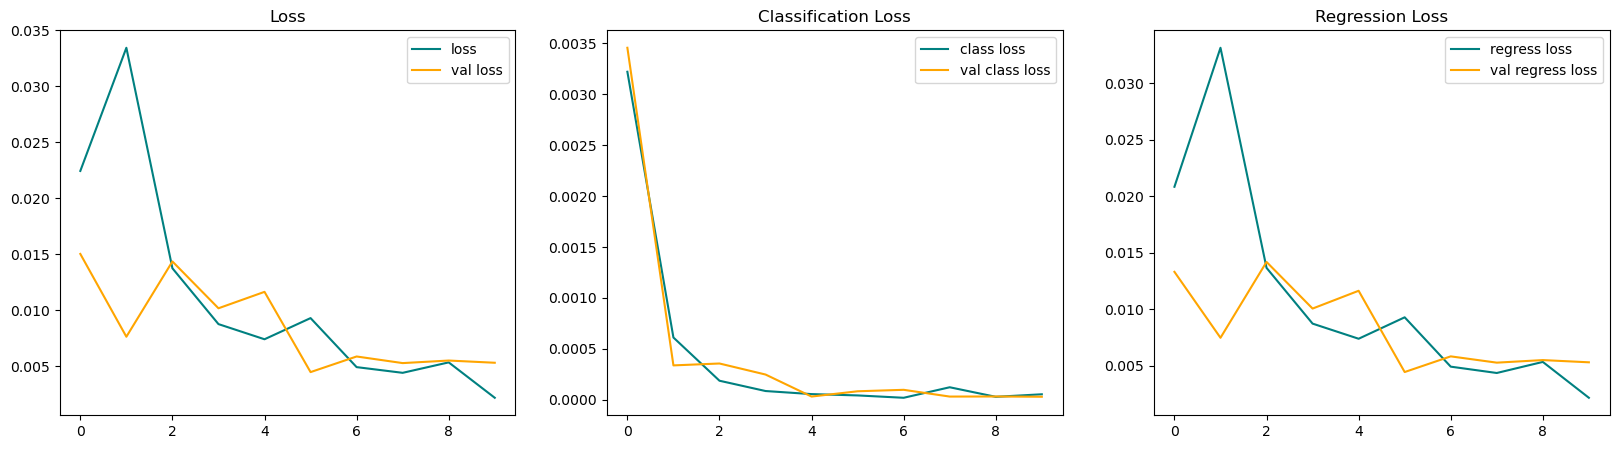

In [51]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

### Предсказания на тестовом наборе

In [60]:
test_data = test.as_numpy_iterator()

In [64]:
test_sample = test_data.next()

In [65]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 157ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


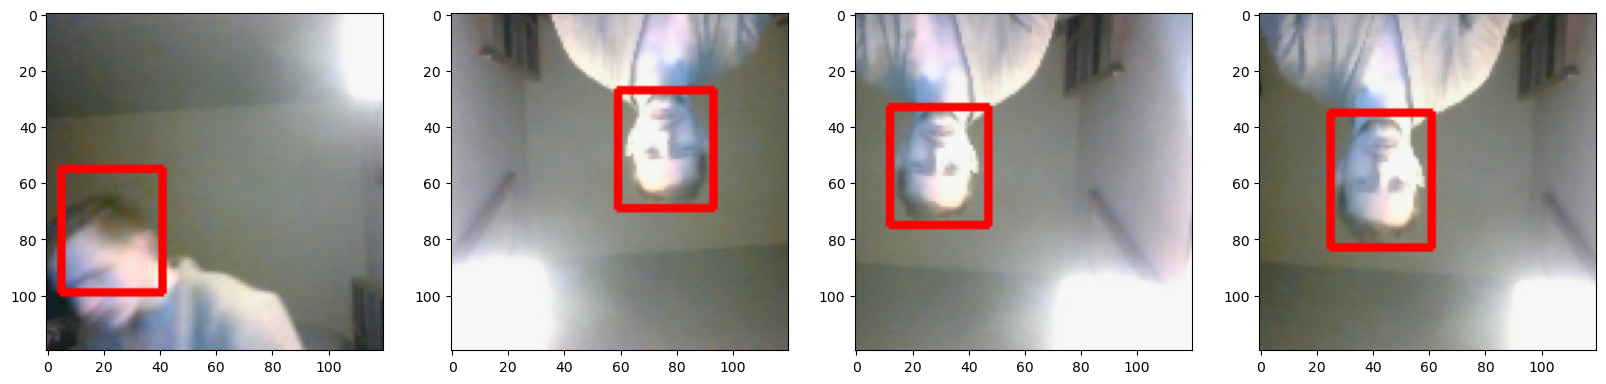

In [66]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### Сохранение и загрузка модели

In [10]:
from tensorflow.keras.models import load_model
import cv2
import tensorflow as tf
import numpy as np

In [57]:
facetracker.save('facetracker1.h5')

In [2]:
facetracker = load_model('facetracker.h5')

### Определение лица в реальном времени

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 65ms/step
